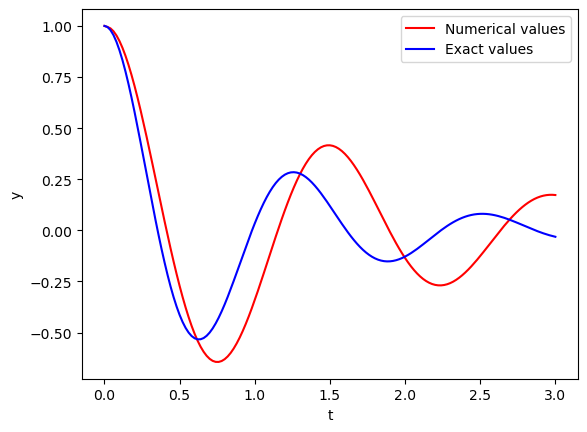

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return np.array([y[1], -2*y[1] - 26*y[0]]) 

def rk4(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5*h, y + 0.5*k1)
    k3 = h * f(t + 0.5*h, y + 0.5*k2) 
    k4 = h * f(t + h, y + k3)

    return y + (k1 + 2*k2 + 2*k3 + k4)/6

def multistep(y, f, h):
    y0, y1, y2 = y
    return y1 + (h/6)*(f(0, y0) + 4*f(h, y1) + f(2*h, y2))

t = np.arange(0, 3 + 0.02, 0.02)
y_exact = np.exp(-t)*((1/5)*np.sin(5*t) + np.cos(5*t))

y = np.zeros((len(t), 2))
# Initial conditions
# Get accurate y1, y2
y[0,:] = [1, 0] 
y[1,:] = rk4(f, 0, y[0], 0.02) 

for n in range(2, len(t)):
    y[n] = multistep(y[n-2:n+1], f, 0.02) 

plt.plot(t, y[:,0], 'r-') 
plt.plot(t, y_exact, 'b-')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(['Numerical values', 'Exact values'])

In [16]:
alpha = 0
beta = 1
gamma = 4
eta = 1
h = 0.02  
t_max = 3.0

In [17]:
def f(t, y):
    y1, y2 = y 
    dy1dt = y2
    dy2dt = -2 * y2 - 26 * y1
    return np.array([dy1dt, dy2dt])

In [18]:
t = 0
y = np.array([1.0, 0.0]) 

t_values = [t]
y_values = [y[0]] 

In [19]:
while t < t_max:
    y_pred = y + h * (alpha * f(t - 2 * h, y) + beta * f(t - h, y) + gamma * f(t, y) + eta * f(t + h, y))
    y = y_pred
    t += h

    t_values.append(t)
    y_values.append(y[0])


In [20]:
def exact_solution(t):
    return np.exp(-t) * (np.cos(5 * t) + (1/5) * np.sin(5 * t))

exact_values = [exact_solution(t) for t in t_values]

In [21]:
error = np.abs(np.array(exact_values) - np.array(y_values))

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_values, label='Numerical Solution', marker='o', markersize=3)
plt.plot(t_values, exact_values, label='Exact Solution', linestyle='--')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.title('Numerical vs. Exact Solutions')
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.loglog(t_values, error, label='Absolute Error', marker='o', markersize=3)
plt.xlabel('h (log scale)')
plt.ylabel('Absolute Error (log scale)')
plt.title('Absolute Error vs. Time Step (h)')
plt.grid(True)

plt.show()